In [1]:
from CoRe_Dataloader_ECSG import load_raw_from_pth_file
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

Index found, updating...

git-pull core_database_index ...
 
done!
 Found R01
 Found R02
 Found R03
 Found R04
Found BAM:0001
 Found R01
 Found R02
Found BAM:0002
 Found R01
 Found R02
Found BAM:0003
 Found R01
 Found R02
Found BAM:0004
 Found R01
 Found R02
Found BAM:0005
 Found R01
 Found R02
Found BAM:0006
 Found R01
 Found R02
Found BAM:0007
 Found R01
 Found R02
Found BAM:0008
 Found R01
Found BAM:0009
 Found R01
 Found R02
Found BAM:0010
 Found R01
 Found R02
Found BAM:0011
 Found R01
 Found R02
Found BAM:0012
 Found R01
 Found R02
Found BAM:0013
 Found R01
 Found R02
Found BAM:0014
 Found R01
 Found R02
Found BAM:0015
 Found R01
 Found R02
Found BAM:0016
 Found R01
 Found R02
Found BAM:0017
 Found R01
 Found R02
Found BAM:0018
 Found R01
 Found R02
Found BAM:0019
 Found R01
 Found R02
Found BAM:0020
 Found R01
 Found R02
Found BAM:0021
 Found R01
 Found R02
Found BAM:0022
 Found R01
Found BAM:0023
 Found R01
 Found R02
Found BAM:0024
 Found R01
Found BAM:0025
 Found R01
 Found R

In [2]:
spectrograms, parameters = load_raw_from_pth_file()

In [3]:
tbc = []
for sgram, param in zip(spectrograms,parameters):
    param = param.cpu().numpy()
    map(lambda x: x.cpu().item(), param)
    sgram = sgram.cpu()
    sgram = sgram.numpy()
    tbc.append(pd.DataFrame([sgram,*param]).T)
combined = pd.concat(tbc)
combined

c:\Users\aashr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0,1,2,3
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",16.0,1.350149,1.350149
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",11.0,1.635,1.114
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",16.0,1.35,1.35
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",14.0,1.650025,1.1
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",14.0,1.500016,1.000001
...,...,...,...,...
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10.0,1.500021,1.500021
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",14.0,1.38127,1.38127
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",14.0,1.375008,1.375008
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",16.0,1.350608,1.350608


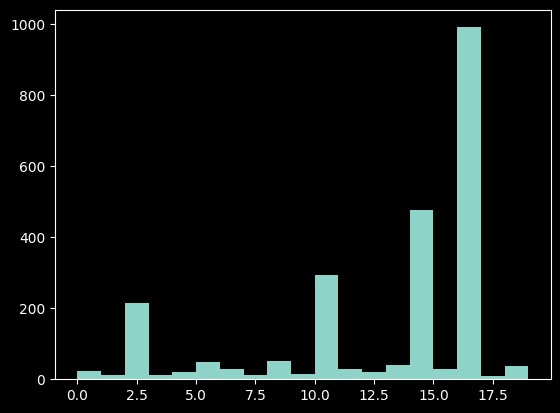

In [4]:
pltdata = plt.hist(combined[1],bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [5]:
freq = pltdata[0]
eos = pltdata[1]


In [6]:
for i,j in zip(eos,freq):
    print(i,j)

0.0 24.0
1.0 12.0
2.0 215.0
3.0 13.0
4.0 20.0
5.0 50.0
6.0 29.0
7.0 11.0
8.0 52.0
9.0 16.0
10.0 293.0
11.0 28.0
12.0 21.0
13.0 39.0
14.0 475.0
15.0 30.0
16.0 990.0
17.0 9.0
18.0 36.0


In [7]:
sixteens = combined[combined[1] == 16]
fourteens = combined[combined[1] == 14]
tens = combined[combined[1] == 10]
twos = combined[combined[1] == 2]
others = combined[~combined[1].isin([16,14,10,2])]


In [8]:
fivetypes = [sixteens,fourteens,tens,twos,others]
sixteens.loc[:, 1] = 0
fourteens.loc[:, 1] = 1
tens.loc[:, 1] = 2
twos.loc[:, 1] = 3
others.loc[:, 1] = 4


C:\Users\aashr\AppData\Local\Temp\ipykernel_18956\1821812001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixteens.loc[:, 1] = 0
C:\Users\aashr\AppData\Local\Temp\ipykernel_18956\1821812001.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sixteens.loc[:, 1] = 0
C:\Users\aashr\AppData\Local\Temp\ipykernel_18956\1821812001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [16]:
combined = pd.concat(fivetypes).to_numpy()

In [17]:
combined

array([[array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]), 0, 1.350149, 1.350149],
       [array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]), 0, 1.35, 1.35],
       [array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]), 0, 1.375004, 1.375004],
       ...,
       [array([[0., 0., 0., ..

In [18]:
spectrograms = combined[:,0]
parameters = combined[:,1:]

In [32]:
spectrograms = torch.tensor(np.stack(list(spectrograms)))
parameters = torch.tensor(np.stack(list(parameters)).astype(float))

In [ ]:
torch.save([spectrograms.shape,parameters.shape],"five_category_spectrograms.pth")